In [1]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn
import sklearn.model_selection as ms
import sklearn.metrics as met
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
link_file = "/content/drive/My Drive/BDC/train_fktp.csv"
df = pd.read_csv(link_file)
df.columns = ['PSTV01','PSTV02','PSTV15','FKP02','FKP03','FKP04','FKP05','FKP06','FKP07','FKP08','FKP09','FKP10','FKP11','FKP12','FKP14','FKP14A','FKP15','FKP15A','FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22','FKP13Class']
df.describe()

,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22
count,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056896e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06,4.056897e+06
mean,9.153455e+07,9.488336e+07,1.056512e+02,3.608866e+01,3.636690e+03,5.652856e+00,1.677882e+00,2.709430e+00,1.064594e+00,5.239781e+00,3.489451e+00,3.936368e+03,9.223593e+01,9.406489e+03,8.944208e+01,8.893204e+01,9.169130e+01,9.809351e+01,1.340221e+00
std,8.994427e+07,8.852258e+07,1.886474e+02,1.870093e+01,1.869268e+03,2.935862e+00,8.353439e-01,1.312048e+00,3.403495e-01,5.678255e+00,1.384493e+00,4.365511e+03,1.877501e+01,1.922342e+03,2.665995e+01,2.823298e+01,1.973518e+01,2.911491e-01,4.737833e-01
min,1.500000e+01,1.500000e+01,5.106980e-01,1.100000e+01,1.101000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.000000e+00,1.000000e+00,5.000000e+00,9.800000e+01,1.000000e+00
25%,3.377225e+07,3.577565e+07,1.676808e+01,3.100000e+01,3.171000e+03,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.920000e+02,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,1.000000e+00
50%,6.760764e+07,7.181594e+07,5.147561e+01,3.300000e+01,3.318000e+03,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.510000e+02,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,1.000000e+00
75%,1.015583e+08,1.113200e+08,1.282688e+02,3.600000e+01,3.603000e+03,9.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,1.200000e+01,5.000000e+00,9.999000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,2.000000e+00
max,4.553885e+08,4.553824e+08,3.035342e+04,9.400000e+01,9.471000e+03,9.000000e+00,7.000000e+00,1.000000e+01,3.000000e+00,2.800000e+01,5.000000e+00,9.999000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.900000e+01,9.900000e+01,2.000000e+00


In [4]:
df1 = df.copy()
df1

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
1,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
3,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat
4,189355720.0,69855169,30.044949,97010720P000238,2020-07-15,2020-07-15,62,6206,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056892,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056893,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,...,H269,"Cataract, unspecified",35,3514,9,2,14,99,1,Belum_Sehat
4056894,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,...,9999,9999,98,9998,98,98,98,98,2,Sehat
4056895,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,...,K30,Dyspepsia,98,9998,98,98,98,98,1,Belum_Sehat


In [5]:
df1['FKP03'] =  pd.to_datetime(df1['FKP03'], format='%Y-%m-%d')
df1['FKP04'] =  pd.to_datetime(df1['FKP04'], format='%Y-%m-%d')

In [6]:
df['FKP3.5'] = (df1.FKP04 - df1.FKP03)/np.timedelta64(1, 'D')

In [7]:
df['FKP3.5'].value_counts()

0.0      4028906
1.0        12257
2.0         7139
3.0         5049
4.0         2126
          ...   
45.0           1
72.0           1
37.0           1
138.0          1
65.0           1
Name: FKP3.5, Length: 95, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056897 entries, 0 to 4056896
Data columns (total 27 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PSTV01      float64
 1   PSTV02      int64  
 2   PSTV15      float64
 3   FKP02       object 
 4   FKP03       object 
 5   FKP04       object 
 6   FKP05       int64  
 7   FKP06       int64  
 8   FKP07       int64  
 9   FKP08       int64  
 10  FKP09       int64  
 11  FKP10       int64  
 12  FKP11       float64
 13  FKP12       int64  
 14  FKP14       int64  
 15  FKP14A      object 
 16  FKP15       object 
 17  FKP15A      object 
 18  FKP16       int64  
 19  FKP17       int64  
 20  FKP18       int64  
 21  FKP19       int64  
 22  FKP20       int64  
 23  FKP21       int64  
 24  FKP22       int64  
 25  FKP13Class  object 
 26  FKP3.5      float64
dtypes: float64(4), int64(16), object(7)
memory usage: 835.7+ MB


In [9]:
df.drop(['PSTV01', 'PSTV02', 'FKP02', 'FKP03','FKP04','FKP14A','FKP15','FKP15A'], axis=1, inplace=True)

In [10]:
df

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class,FKP3.5
0,2.626307,51,5171,9,3,2,1,1.0,4,773,98,9998,98,98,98,98,1,Belum_Sehat,0.0
1,1.051830,35,3516,9,2,1,1,3.0,4,1757,98,9998,98,98,98,98,1,Belum_Sehat,0.0
2,364.741455,34,3402,3,1,4,1,1.0,5,621,98,9998,98,98,98,98,1,Belum_Sehat,0.0
3,1.050523,35,3509,3,1,4,1,1.0,1,622,98,9998,98,98,98,98,1,Belum_Sehat,0.0
4,30.044949,62,6206,3,1,4,1,1.0,4,621,98,9998,98,98,98,98,1,Belum_Sehat,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056892,14.246229,35,3505,9,3,2,1,12.0,4,9999,98,9998,98,98,98,98,2,Sehat,0.0
4056893,3.886934,35,3514,9,2,1,1,1.0,5,561,35,3514,9,2,14,99,1,Belum_Sehat,0.0
4056894,6.146070,11,1171,4,2,1,1,13.0,5,9999,98,9998,98,98,98,98,2,Sehat,0.0
4056895,26.548826,74,7402,3,1,3,1,1.0,2,774,98,9998,98,98,98,98,1,Belum_Sehat,0.0


In [11]:
encoder = LabelEncoder()
encoder.fit(df['FKP13Class'])

LabelEncoder()

In [12]:
df['FKP13Class'] = encoder.transform(df['FKP13Class'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056897 entries, 0 to 4056896
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PSTV15      float64
 1   FKP05       int64  
 2   FKP06       int64  
 3   FKP07       int64  
 4   FKP08       int64  
 5   FKP09       int64  
 6   FKP10       int64  
 7   FKP11       float64
 8   FKP12       int64  
 9   FKP14       int64  
 10  FKP16       int64  
 11  FKP17       int64  
 12  FKP18       int64  
 13  FKP19       int64  
 14  FKP20       int64  
 15  FKP21       int64  
 16  FKP22       int64  
 17  FKP13Class  int64  
 18  FKP3.5      float64
dtypes: float64(3), int64(16)
memory usage: 588.1 MB


<Axes: >

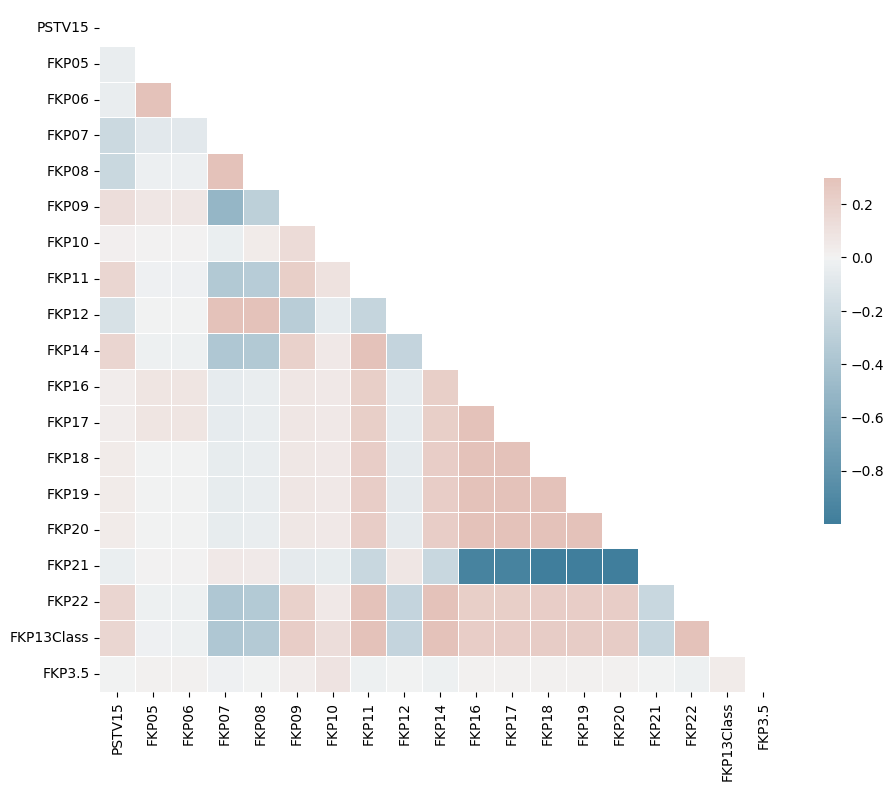

In [14]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
print(corr)

              PSTV15     FKP05     FKP06     FKP07     FKP08     FKP09  \
PSTV15      1.000000 -0.045029 -0.044125 -0.217185 -0.223775  0.126175   
FKP05      -0.045029  1.000000  0.999877 -0.082372 -0.027144  0.070520   
FKP06      -0.044125  0.999877  1.000000 -0.081276 -0.026551  0.067664   
FKP07      -0.217185 -0.082372 -0.081276  1.000000  0.849700 -0.508048   
FKP08      -0.223775 -0.027144 -0.026551  0.849700  1.000000 -0.290546   
FKP09       0.126175  0.070520  0.067664 -0.508048 -0.290546  1.000000   
FKP10       0.018357  0.003379  0.003427 -0.033730  0.038182  0.146983   
FKP11       0.176581 -0.013347 -0.013246 -0.358463 -0.323045  0.222935   
FKP12      -0.142162 -0.008993 -0.006950  0.449834  0.382544 -0.317317   
FKP14       0.181515 -0.017572 -0.017725 -0.373310 -0.350526  0.206437   
FKP16       0.034737  0.082238  0.081767 -0.058809 -0.047160  0.070087   
FKP17       0.034946  0.080107  0.079656 -0.058681 -0.047224  0.069849   
FKP18       0.039760 -0.006015 -0.0064

In [16]:
#pd.plotting.lag_plot(df, lag=1)

In [17]:
print(df)

             PSTV15  FKP05  FKP06  FKP07  FKP08  FKP09  FKP10  FKP11  FKP12  \
0          2.626307     51   5171      9      3      2      1    1.0      4   
1          1.051830     35   3516      9      2      1      1    3.0      4   
2        364.741455     34   3402      3      1      4      1    1.0      5   
3          1.050523     35   3509      3      1      4      1    1.0      1   
4         30.044949     62   6206      3      1      4      1    1.0      4   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
4056892   14.246229     35   3505      9      3      2      1   12.0      4   
4056893    3.886934     35   3514      9      2      1      1    1.0      5   
4056894    6.146070     11   1171      4      2      1      1   13.0      5   
4056895   26.548826     74   7402      3      1      3      1    1.0      2   
4056896   88.348953     73   7317      3      1      4      1   13.0      2   

         FKP14  FKP16  FKP17  FKP18  FKP19  FKP20  

In [18]:
df.isnull().sum()

PSTV15        0
FKP05         0
FKP06         0
FKP07         0
FKP08         0
FKP09         0
FKP10         0
FKP11         1
FKP12         0
FKP14         0
FKP16         0
FKP17         0
FKP18         0
FKP19         0
FKP20         0
FKP21         0
FKP22         0
FKP13Class    0
FKP3.5        0
dtype: int64

In [19]:
df=df.dropna()

In [20]:
Y = df['FKP13Class']
X = df.copy()
#X.drop(['FKP13Class','FKP05','FKP06','FKP10','FKP16','FKP17','FKP18','FKP19','FKP20'],axis=1, inplace=True)
#X.drop(['FKP13Class','FKP05','FKP06','FKP11','FKP14','FKP16','FKP17','FKP18','FKP18','FKP19','FKP20','FKP21','FKP22','FKP07','FKP08','FKP10','FKP12'],axis=1, inplace=True)
X.drop(['FKP13Class'],axis=1, inplace=True)
X

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP3.5
0,2.626307,51,5171,9,3,2,1,1.0,4,773,98,9998,98,98,98,98,1,0.0
1,1.051830,35,3516,9,2,1,1,3.0,4,1757,98,9998,98,98,98,98,1,0.0
2,364.741455,34,3402,3,1,4,1,1.0,5,621,98,9998,98,98,98,98,1,0.0
3,1.050523,35,3509,3,1,4,1,1.0,1,622,98,9998,98,98,98,98,1,0.0
4,30.044949,62,6206,3,1,4,1,1.0,4,621,98,9998,98,98,98,98,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056892,14.246229,35,3505,9,3,2,1,12.0,4,9999,98,9998,98,98,98,98,2,0.0
4056893,3.886934,35,3514,9,2,1,1,1.0,5,561,35,3514,9,2,14,99,1,0.0
4056894,6.146070,11,1171,4,2,1,1,13.0,5,9999,98,9998,98,98,98,98,2,0.0
4056895,26.548826,74,7402,3,1,3,1,1.0,2,774,98,9998,98,98,98,98,1,0.0


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4056896 entries, 0 to 4056896
Data columns (total 18 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PSTV15  float64
 1   FKP05   int64  
 2   FKP06   int64  
 3   FKP07   int64  
 4   FKP08   int64  
 5   FKP09   int64  
 6   FKP10   int64  
 7   FKP11   float64
 8   FKP12   int64  
 9   FKP14   int64  
 10  FKP16   int64  
 11  FKP17   int64  
 12  FKP18   int64  
 13  FKP19   int64  
 14  FKP20   int64  
 15  FKP21   int64  
 16  FKP22   int64  
 17  FKP3.5  float64
dtypes: float64(3), int64(15)
memory usage: 588.1 MB


In [22]:
#VIF

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

   feature           VIF
0   PSTV15      1.081605
1    FKP05   4547.565503
2    FKP06   4545.616823
3    FKP07      5.182767
4    FKP08      4.101141
5    FKP09      1.590687
6    FKP10      1.065967
7    FKP11     11.587914
8    FKP12      1.305890
9    FKP14    187.034705
10   FKP16  40911.995307
11   FKP17  42936.120134
12   FKP18   1062.166294
13   FKP19  10532.464456
14   FKP20    117.122244
15   FKP21   1039.888433
16   FKP22    187.506151
17  FKP3.5      1.010869


In [23]:
X.drop(['FKP05','FKP06','FKP14','FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22'],axis=1, inplace=True)

In [24]:
X.drop(['FKP07'],axis=1,inplace=True)

In [25]:
X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y,X_sm.astype(int)).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:             FKP13Class   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 4.589e+06
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:45:12   Log-Likelihood:             1.6836e+06
No. Observations:             4056896   AIC:                        -3.367e+06
Df Residuals:                 4056888   BIC:                        -3.367e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0639      0.000   -147.945      0.0

In [26]:
ss = StandardScaler()
cols = X.columns
X[cols] = ss.fit_transform(X[cols])

In [27]:
X_train,X_val,Y_train,Y_val = ms.train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
print(X_train)
print(Y_train)
print(X_val)
print(Y_val)

           PSTV15     FKP08     FKP09     FKP10    FKP11     FKP12   FKP3.5
3596279 -0.435698  0.385611 -1.302871 -0.189789 -0.74667  0.368762 -0.03287
3832304 -0.461919  1.582723 -0.540704 -0.189789 -0.74667  0.368762 -0.03287
105872  -0.262120 -0.811501  0.221463 -0.189789 -0.74667  1.091048 -0.03287
1692870 -0.459252  0.385611 -1.302871 -0.189789 -0.74667  1.091048 -0.03287
518075  -0.520982  0.385611 -1.302871 -0.189789 -0.74667  0.368762 -0.03287
...           ...       ...       ...       ...      ...       ...      ...
2356331 -0.554970  1.582723 -0.540704 -0.189789 -0.74667  1.091048 -0.03287
3511567  1.049868 -0.811501  0.221463 -0.189789 -0.74667 -1.075810 -0.03287
2229085 -0.361800  0.385611  1.745797 -0.189789 -0.74667  1.091048 -0.03287
2768308 -0.330503  1.582723 -0.540704 -0.189789 -0.74667  0.368762 -0.03287
2219111 -0.332286  0.385611 -1.302871 -0.189789 -0.74667  0.368762 -0.03287

[3245516 rows x 7 columns]
3596279    0
3832304    0
105872     0
1692870    0
518075  

In [29]:
print(df)

             PSTV15  FKP05  FKP06  FKP07  FKP08  FKP09  FKP10  FKP11  FKP12  \
0          2.626307     51   5171      9      3      2      1    1.0      4   
1          1.051830     35   3516      9      2      1      1    3.0      4   
2        364.741455     34   3402      3      1      4      1    1.0      5   
3          1.050523     35   3509      3      1      4      1    1.0      1   
4         30.044949     62   6206      3      1      4      1    1.0      4   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
4056892   14.246229     35   3505      9      3      2      1   12.0      4   
4056893    3.886934     35   3514      9      2      1      1    1.0      5   
4056894    6.146070     11   1171      4      2      1      1   13.0      5   
4056895   26.548826     74   7402      3      1      3      1    1.0      2   
4056896   88.348953     73   7317      3      1      4      1   13.0      2   

         FKP14  FKP16  FKP17  FKP18  FKP19  FKP20  

In [30]:
df.isnull().sum()

PSTV15        0
FKP05         0
FKP06         0
FKP07         0
FKP08         0
FKP09         0
FKP10         0
FKP11         0
FKP12         0
FKP14         0
FKP16         0
FKP17         0
FKP18         0
FKP19         0
FKP20         0
FKP21         0
FKP22         0
FKP13Class    0
FKP3.5        0
dtype: int64

In [31]:
X_train.head()

,PSTV15,FKP08,FKP09,FKP10,FKP11,FKP12,FKP3.5
3596279,-0.435698,0.385611,-1.302871,-0.189789,-0.74667,0.368762,-0.03287
3832304,-0.461919,1.582723,-0.540704,-0.189789,-0.74667,0.368762,-0.03287
105872,-0.262120,-0.811501,0.221463,-0.189789,-0.74667,1.091048,-0.03287
1692870,-0.459252,0.385611,-1.302871,-0.189789,-0.74667,1.091048,-0.03287
518075,-0.520982,0.385611,-1.302871,-0.189789,-0.74667,0.368762,-0.03287


#Logistic Regression

In [32]:
model = lm.LogisticRegression(max_iter=100000000) #MLE
model.fit(X_train,Y_train)

LogisticRegression(max_iter=100000000)

In [ ]:
print(model.coef_)

In [35]:
Y_prediksi=model.predict(X_val)
print(Y_prediksi)

[1 0 0 ... 1 1 1]


In [36]:
confusionmatrix = met.confusion_matrix(Y_val,Y_prediksi)

In [37]:
print(confusionmatrix)

[[522347   4150]
 [  3156 281727]]


In [38]:
score = model.score(X_val,Y_val)
print(score)

0.9909955877640563


In [39]:
precision = met.precision_score(Y_val,Y_prediksi)
print(precision)

0.9854832672792845


In [40]:
#Cross Validation
scores = ms.cross_val_score(model, X_val, Y_val, cv=6)
scores

array([0.99112623, 0.99083783, 0.99071951, 0.99100052, 0.99077128,
       0.99055683])

In [41]:
print(classification_report(Y_val,Y_prediksi))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    526497
           1       0.99      0.99      0.99    284883

    accuracy                           0.99    811380
   macro avg       0.99      0.99      0.99    811380
weighted avg       0.99      0.99      0.99    811380



#Decision Tree

In [42]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
dt_pred = dt_model.predict(X_val)

In [44]:
print(confusion_matrix(Y_val,dt_pred))

[[525632    865]
 [  2282 282601]]


In [45]:
print(classification_report(Y_val,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526497
           1       1.00      0.99      0.99    284883

    accuracy                           1.00    811380
   macro avg       1.00      1.00      1.00    811380
weighted avg       1.00      1.00      1.00    811380



#Tes

In [46]:
#link_file_test = "/content/drive/My Drive/Bondo Wani/test_fktp.txt" #Saddam
link_file_test = "/content/drive/My Drive/data satdat/test_fktp.csv" #Ojan
df2 = pd.read_csv(link_file_test, header=None)

<ipython-input-46-cb138728e0f0>:3: DtypeWarning: Columns (3,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(link_file_test, header=None)


In [47]:
df2.columns = ['PSTV01','PSTV02','PSTV15','FKP02','FKP03','FKP04','FKP05','FKP06','FKP07','FKP08','FKP09','FKP10','FKP11','FKP12','FKP14','FKP14A','FKP15','FKP15A','FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22']
df2

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014220,51801010.0,51801010,7.563763,248870919P000406,2019-09-08,2019-09-08,36,3601,9,2,...,Z99,Z992,Dependence on renal dialysis,36,3602,3,1,27,99,1
1014221,339397889.0,339397889,11.063568,116000620P000034,2020-06-02,2020-06-02,33,3373,9,2,...,Z99,Z999,Dependence on unspecified enabling machine and...,98,9998,98,98,98,98,1
1014222,76213152.0,76213152,286.792694,160421019P000631,2019-10-15,2019-10-15,32,3276,3,1,...,Z99,Z992,Dependence on renal dialysis,32,3276,9,1,33,99,1
1014223,101797983.0,101797983,30.222155,332670919P000083,2019-09-06,2019-09-06,16,1606,3,1,...,Z99,Z992,Dependence on renal dialysis,16,1606,3,1,27,99,1


In [48]:
df3 = df2.copy()

In [49]:
df2.drop(['PSTV01', 'PSTV02', 'FKP02', 'FKP03','FKP04','FKP14A','FKP15','FKP15A','FKP05','FKP06','FKP14','FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22'],axis=1, inplace=True)

In [50]:
df2.drop(['FKP07'],axis=1,inplace=True)

In [51]:
df3['FKP03'] =  pd.to_datetime(df1['FKP03'], format='%Y-%m-%d')
df3['FKP04'] =  pd.to_datetime(df1['FKP04'], format='%Y-%m-%d')
df2['FKP3.5'] = (df3.FKP04 - df3.FKP03)/np.timedelta64(1, 'D')

In [52]:
X_test = df2.copy()
# X_val2.drop(['FKP05','FKP06','FKP10','FKP16','FKP17','FKP18','FKP19','FKP20'],axis=1, inplace=True)

In [53]:
#Pred Logistic Regression
#Y_pred_log = model.predict(X_test)
#print (Y_test_log)

#Pred Decision Tree
#Y_pred_dt = dt_model.predict(X_test)

#Pred XG Boost
model = XGBClassifier(n_estimators=400)
model.fit(X_train, Y_train)
Y_pred_xg = model.predict(X_test)

#Y_pred_ann = ann.predict(X_test)


In [54]:
link_file_sub = "/content/drive/My Drive/BDC/submission.csv" #Saddam
link_file_test = "/content/drive/My Drive/BDC/test_fktp.csv" #Ojan
df_sub1 = pd.read_csv(link_file_sub)
df_sub1.drop(['Status'], axis=1, inplace=True)

<ipython-input-54-8096915d066b>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sub1 = pd.read_csv(link_file_sub)


In [55]:
df_sub1

,Unnamed: 0,FKP02
0,1,954386050
1,2,774246805
2,3,1202010273
3,4,1286640248
4,5,1285179242
...,...,...
1014220,1014221,248870919P000406
1014221,1014222,116000620P000034
1014222,1014223,160421019P000631
1014223,1014224,332670919P000083


In [56]:
Y_hasil = pd.DataFrame(Y_pred_xg,columns=['Status'])
df_mbuh = df_sub1.copy()
#subs = df_sub1.append(Y_hasil)
#subs.to_csv("/content/drive/My Drive/Bondo Wani/bismillah.csv")

In [57]:
final1 = pd.concat([df_mbuh,Y_hasil], axis=1)

In [58]:
final1

,Unnamed: 0,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


##Checkpoint

In [62]:
met.classification_report(Y_val,Y_prediksi)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99    526497\n           1       0.99      0.99      0.99    284883\n\n    accuracy                           0.99    811380\n   macro avg       0.99      0.99      0.99    811380\nweighted avg       0.99      0.99      0.99    811380\n'

#Random Forest

In [63]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500)

In [64]:
rf_pre=rf.predict(X_val)

In [ ]:
print(confusion_matrix(Y_val,rf_pre))

In [66]:
print(classification_report(Y_val,rf_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526497
           1       1.00      0.99      0.99    284883

    accuracy                           1.00    811380
   macro avg       1.00      1.00      1.00    811380
weighted avg       1.00      1.00      1.00    811380

